In [1]:
# data manipulation
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# random forest regressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, accuracy_score
import math

# grid search
from sklearn.model_selection import GridSearchCV

# visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.DataFrame()

train_data['hysteresis'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/hysteresis_all_scaled_train.csv')['total']
train_data['id'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/idiq_all_scaled_train.csv')['id']
train_data['iq'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/idiq_all_scaled_train.csv')['iq']
train_data['joule'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/joule_all_scaled_train.csv')['total']
train_data['speed'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/speed_all_scaled_train.csv')['N']
train_data['d1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/xgeom_all_scaled_train.csv')['d1']
train_data['d2'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/xgeom_all_scaled_train.csv')['d2']
train_data['d3'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/xgeom_all_scaled_train.csv')['d3']
train_data['d4'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/xgeom_all_scaled_train.csv')['d4']
train_data['d5'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/xgeom_all_scaled_train.csv')['d5']
train_data['d6'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/xgeom_all_scaled_train.csv')['d6']
train_data['d7'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/xgeom_all_scaled_train.csv')['d7']
train_data['d8'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/xgeom_all_scaled_train.csv')['d8']

In [3]:
test_data = pd.DataFrame()

test_data['hysteresis'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/hysteresis_all_scaled_test.csv')['total']
test_data['id'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/idiq_all_scaled_test.csv')['id']
test_data['iq'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/idiq_all_scaled_test.csv')['iq']
test_data['joule'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/joule_all_scaled_test.csv')['total']
test_data['speed'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/speed_all_scaled_test.csv')['N']
test_data['d1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/xgeom_all_scaled_test.csv')['d1']
test_data['d2'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/xgeom_all_scaled_test.csv')['d2']
test_data['d3'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/xgeom_all_scaled_test.csv')['d3']
test_data['d4'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/xgeom_all_scaled_test.csv')['d4']
test_data['d5'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/xgeom_all_scaled_test.csv')['d5']
test_data['d6'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/xgeom_all_scaled_test.csv')['d6']
test_data['d7'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/xgeom_all_scaled_test.csv')['d7']
test_data['d8'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/Nabla/xgeom_all_scaled_test.csv')['d8']

In [4]:
def combinedHist (name, y_test, prediction, binss = 100):
    fig = plt.figure(figsize = (6, 6))
    grid = plt.GridSpec(4, 4, hspace = 0.2, wspace = 0.4)

    main_ax = fig.add_subplot(grid[:-1, 1:])

    y_hist = fig.add_subplot(grid[:-1, 0],
                            xticklabels = [],
                            sharey = main_ax)
    x_hist = fig.add_subplot(grid[-1, 1:],
                            yticklabels = [],
                            sharex = main_ax)

    main_ax.hist2d(y_test, prediction,
                bins = binss, cmap = 'Blues')

    x_hist.hist(y_test, histtype = 'stepfilled', bins = binss,
                orientation = 'vertical', color = 'green', alpha = 0.3)
    x_hist.invert_yaxis()

    y_hist.hist(prediction, histtype = 'stepfilled', bins = binss,
                orientation = 'horizontal', color = 'green', alpha = 0.3)
    y_hist.invert_xaxis()

    fig.suptitle("{} - Test and Prediction Comparison".format(name), size = 18)

In [5]:
def hist2d (name, y_test, prediction, binss = 100):
    plt.hist2d(y_test, prediction, bins = binss)

    plt.title('{} - y_test and prediction'.format(name))

    plt.colorbar()

    plt.xlabel('y_test')
    plt.ylabel('prediction')

In [6]:
variable = 'hysteresis'

columns = ['hysteresis', 'joule']

X_train = train_data.drop(columns = columns)
y_train = train_data[variable]

X_test = test_data.drop(columns = columns)
y_test = test_data[variable]

## Predictions Without Grid Search

In [7]:
model = CatBoostRegressor()
model.fit(X_train, y_train)
y_pred_bad = model.predict(X_test)

Learning rate set to 0.067216
0:	learn: 0.9441558	total: 60.8ms	remaining: 1m
1:	learn: 0.8911122	total: 63.3ms	remaining: 31.6s
2:	learn: 0.8406013	total: 67.6ms	remaining: 22.5s
3:	learn: 0.7949858	total: 71.3ms	remaining: 17.8s
4:	learn: 0.7520015	total: 73.9ms	remaining: 14.7s
5:	learn: 0.7113774	total: 76.6ms	remaining: 12.7s
6:	learn: 0.6730886	total: 79.1ms	remaining: 11.2s
7:	learn: 0.6375121	total: 81.6ms	remaining: 10.1s
8:	learn: 0.6040715	total: 83.9ms	remaining: 9.24s
9:	learn: 0.5734370	total: 86.9ms	remaining: 8.61s
10:	learn: 0.5443438	total: 89.1ms	remaining: 8.02s
11:	learn: 0.5169111	total: 91.4ms	remaining: 7.53s
12:	learn: 0.4916187	total: 93.8ms	remaining: 7.12s
13:	learn: 0.4683389	total: 96.2ms	remaining: 6.78s
14:	learn: 0.4470277	total: 98.4ms	remaining: 6.46s
15:	learn: 0.4260285	total: 101ms	remaining: 6.19s
16:	learn: 0.4060807	total: 103ms	remaining: 5.95s
17:	learn: 0.3874306	total: 105ms	remaining: 5.73s
18:	learn: 0.3706944	total: 108ms	remaining: 5.58s

In [8]:
print(f"Coefficient of determination: {r2_score(y_test, y_pred_bad)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred_bad)}")
print(f"Mean absolute percentage error: {mean_absolute_percentage_error(y_test, y_pred_bad)}")

Coefficient of determination: 0.9959042069491438
Mean squared error: 0.003992330429908107
Mean absolute percentage error: 0.8285590670432982


Text(0.5, 1.0, 'hysteresis: Test and Model Prediction')

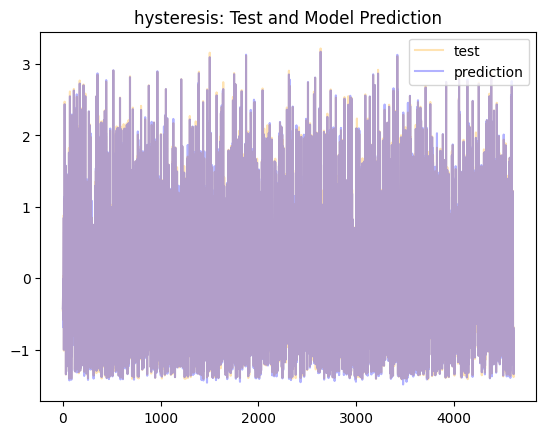

In [9]:
plt.plot(y_test, alpha = 0.3, color = 'orange', label = 'test')
plt.plot(y_pred_bad, alpha = 0.3, color = 'blue', label = 'prediction')
plt.legend()
plt.title(f"{variable}: Test and Model Prediction")

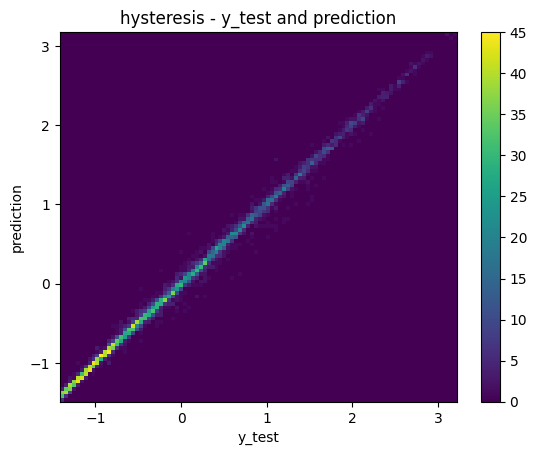

In [10]:
hist2d(variable, y_test, y_pred_bad)

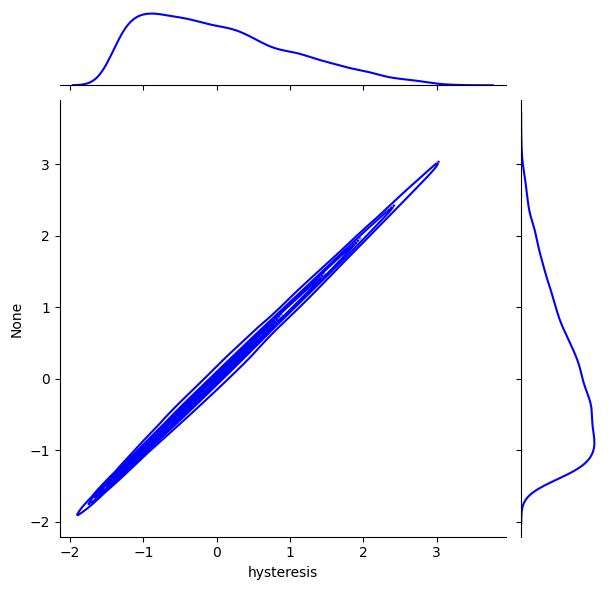

In [11]:
sns.jointplot(x = y_test, y = y_pred_bad, kind = 'kde', color = 'blue')

## Predictions With Grid Search

In [12]:
param_grid = {
    'iterations' : [50, 100],
    'learning_rate' : [0.01, 0.1],
    'depth' : [4, 6, 8],
    'l2_leaf_reg' : [1, 3, 5],
    'border_count' : [32, 64, 128]
}

In [13]:
grid_search = GridSearchCV(estimator = CatBoostRegressor(), 
                           param_grid = param_grid, 
                           cv = 3)

In [14]:
grid_search.fit(X_train, y_train)

0:	learn: 0.9941811	total: 1.67ms	remaining: 82ms
1:	learn: 0.9863344	total: 2.91ms	remaining: 69.8ms
2:	learn: 0.9784275	total: 4.22ms	remaining: 66.2ms
3:	learn: 0.9705760	total: 5.44ms	remaining: 62.5ms
4:	learn: 0.9630990	total: 6.63ms	remaining: 59.7ms
5:	learn: 0.9556630	total: 7.85ms	remaining: 57.6ms
6:	learn: 0.9480198	total: 9.16ms	remaining: 56.3ms
7:	learn: 0.9404544	total: 10.2ms	remaining: 53.4ms
8:	learn: 0.9331288	total: 11.3ms	remaining: 51.4ms
9:	learn: 0.9257974	total: 12.9ms	remaining: 51.6ms
10:	learn: 0.9186316	total: 13.9ms	remaining: 49.1ms
11:	learn: 0.9115275	total: 14.9ms	remaining: 47.3ms
12:	learn: 0.9043391	total: 16ms	remaining: 45.5ms
13:	learn: 0.8974592	total: 17.1ms	remaining: 44ms
14:	learn: 0.8904130	total: 18.2ms	remaining: 42.5ms
15:	learn: 0.8835601	total: 19.4ms	remaining: 41.1ms
16:	learn: 0.8767144	total: 20.4ms	remaining: 39.7ms
17:	learn: 0.8698927	total: 22.2ms	remaining: 39.4ms
18:	learn: 0.8631140	total: 23.3ms	remaining: 38ms
19:	learn: 

,estimator,<catboost.cor...x7fe05a7f3750>
,param_grid,"{'border_count': [32, 64, ...], 'depth': [4, 6, ...], 'iterations': [50, 100], 'l2_leaf_reg': [1, 3, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False


In [15]:
grid_search.best_params_

{'border_count': 128,
 'depth': 8,
 'iterations': 100,
 'l2_leaf_reg': 1,
 'learning_rate': 0.1}

In [16]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [17]:
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean absolute percentage error: {mean_absolute_percentage_error(y_test, y_pred)}")

Coefficient of determination: 0.9929602342822285
Mean squared error: 0.006861936271074123
Mean absolute percentage error: 1.659443372124143


Text(0.5, 1.0, 'hysteresis: Test and Model Prediction')

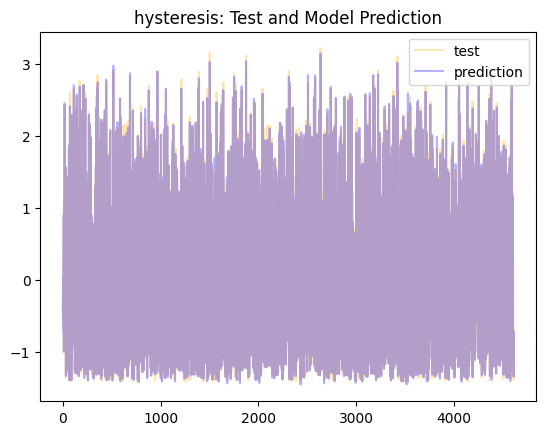

In [18]:
plt.plot(y_test, alpha = 0.3, color = 'orange', label = 'test')
plt.plot(y_pred, alpha = 0.3, color = 'blue', label = 'prediction')
plt.legend()
plt.title(f"{variable}: Test and Model Prediction")

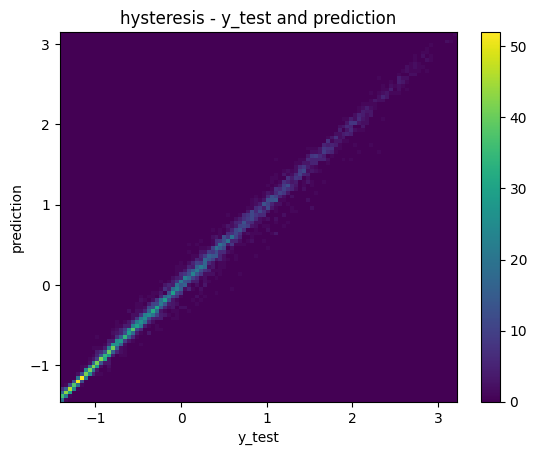

In [19]:
hist2d(variable, y_test, y_pred)

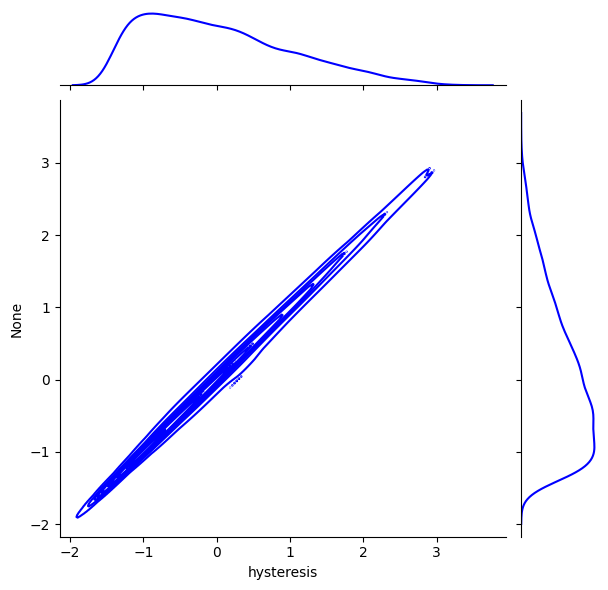

In [20]:
sns.jointplot(x = y_test, y = y_pred, kind = 'kde', color = 'blue')